In [11]:
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
#import streamlit as st
import numpy as np
import plotly.graph_objects as go
import logging
import geopandas as gpd
import shapely
from geopy.geocoders import Nominatim
from scipy.spatial.distance import cdist
from shapely.wkt import loads
from functools import wraps
import time
import pickle
import contextily as ctx

In [2]:
with open('./data/Gf.pkl', 'rb') as input:
    G = pickle.load(input)
with open('./data/BoI_simple.pkl', 'rb') as input:
    BoI = pickle.load(input) 
gdNodes,gdStreets = ox.utils_graph.graph_to_gdfs(G)
gdNodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

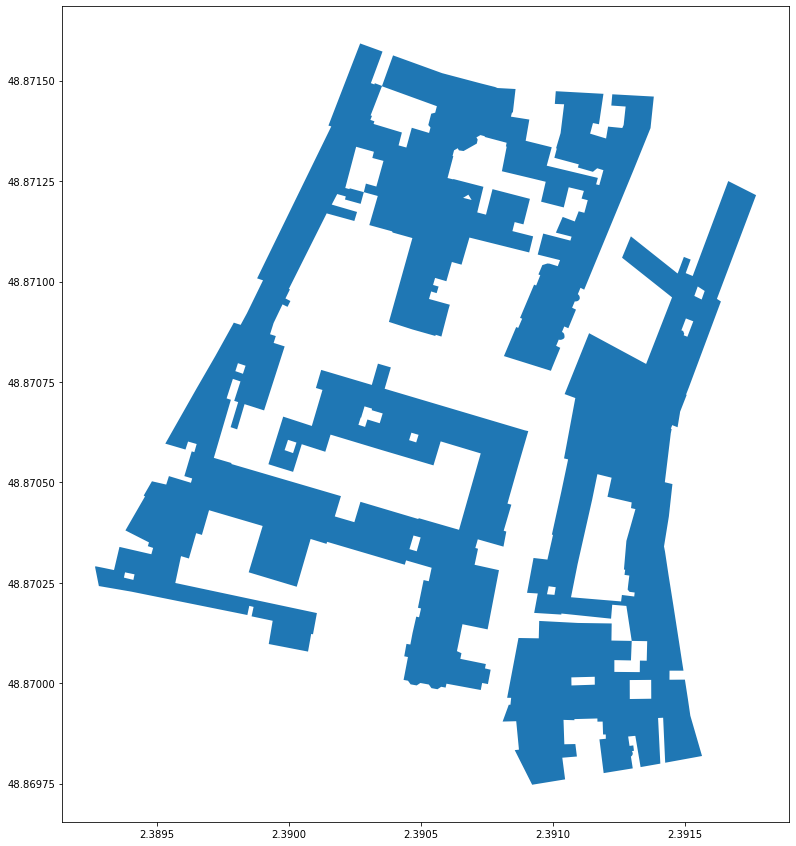

In [40]:
BAT = gpd.GeoDataFrame(BoI.reset_index())
BAT[13:15].plot( figsize=(15,15) )

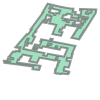

In [46]:
BAT.loc[14].geometry

In [122]:
import io
import re
import subprocess
import zlib
from itertools import chain

import numpy as np
from descartes import PolygonPatch
from shapely.affinity import translate
from shapely.geometry import LineString, Polygon
# import gobject-inspect, cairo and rsvg if the native rsvg SVG_RENDERER should be used
from shapely.ops import unary_union


# Creating shadows

In [138]:

ax = fig.add_subplot(111)

elevation = 5*4
blur_radius = elevation / 5 * 0.25/50000.0
init = [BAT.loc[14].geometry.buffer(blur_radius)]

for k in range(5):
    init.append(translate(init[-1],
                                xoff=(0.00004), yoff=(0.00004)) )
cu = unary_union(init)


for k in range(len(init)):
    X,Y = init[k].exterior.xy
    ax.plot(X, Y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    
x,y = BAT.loc[14].geometry.exterior.xy
ax.plot(x, y, color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

x,y = cu.exterior.xy
ax.plot(x, y, color='black', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

ax.set_title('Polygon')
fig

KeyboardInterrupt: 

# Let's make it industrial

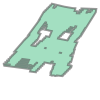

In [161]:
elevation = 5*4
blur_radius = elevation / 5 * 0.25/50000.0
def createShadow(geo):
    init = [geo]#.buffer(blur_radius)
    for k in range(5):
        init.append(translate(init[-1], xoff=(0.00004), yoff=(0.00004)) )
    cu = unary_union(init)
    return cu


createShadow(BAT.loc[14].geometry)

In [162]:
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()

In [163]:
BAT["shade"] = ""
for bat in BAT:
    BAT["shade"] = BAT.geometry.progress_apply(lambda x: createShadow(x))

100%|██████████| 4456/4456 [00:36<00:00, 121.78it/s]


In [164]:
BAT["shade"] 

0       POLYGON ((2.38993 48.85226, 2.38980 48.85223, ...
1       POLYGON ((2.39956 48.85306, 2.39957 48.85304, ...
2       POLYGON ((2.39862 48.85352, 2.39860 48.85352, ...
3       POLYGON ((2.40904 48.85491, 2.40905 48.85490, ...
4       POLYGON ((2.39927 48.85534, 2.39928 48.85532, ...
                              ...                        
4451    POLYGON ((2.34401 48.89029, 2.34401 48.89027, ...
4452    POLYGON ((2.35114 48.89035, 2.35106 48.89031, ...
4453    POLYGON ((2.36490 48.89044, 2.36491 48.89044, ...
4454    POLYGON ((2.39016 48.89032, 2.39016 48.89031, ...
4455    POLYGON ((2.36856 48.89113, 2.36856 48.89112, ...
Name: shade, Length: 4456, dtype: geometry

In [165]:
cBAT = BAT.drop(['geometry'], axis=1)
cBAT["geometry"] = cBAT["shade"] 
cBAT = cBAT.drop(['shade'], axis=1)

In [166]:
with open('data/BoI_shaded.pkl', 'wb') as output: 
    pickle.dump(cBAT, output)

<AxesSubplot:>

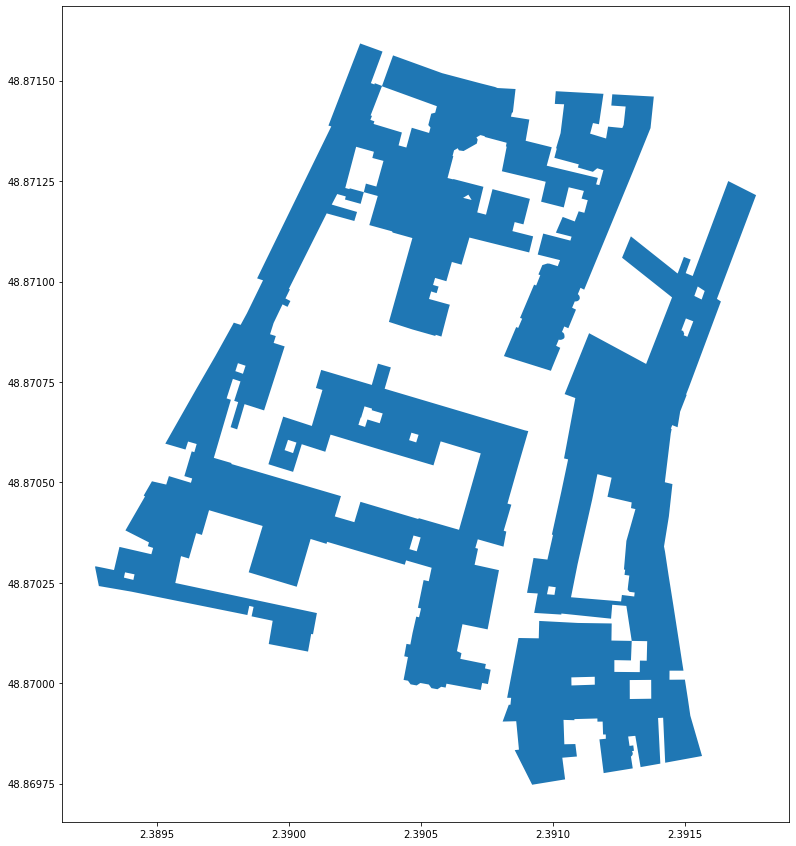

In [167]:
BAT = gpd.GeoDataFrame(BoI.reset_index())
BAT[13:15].plot( figsize=(15,15) )

<AxesSubplot:>

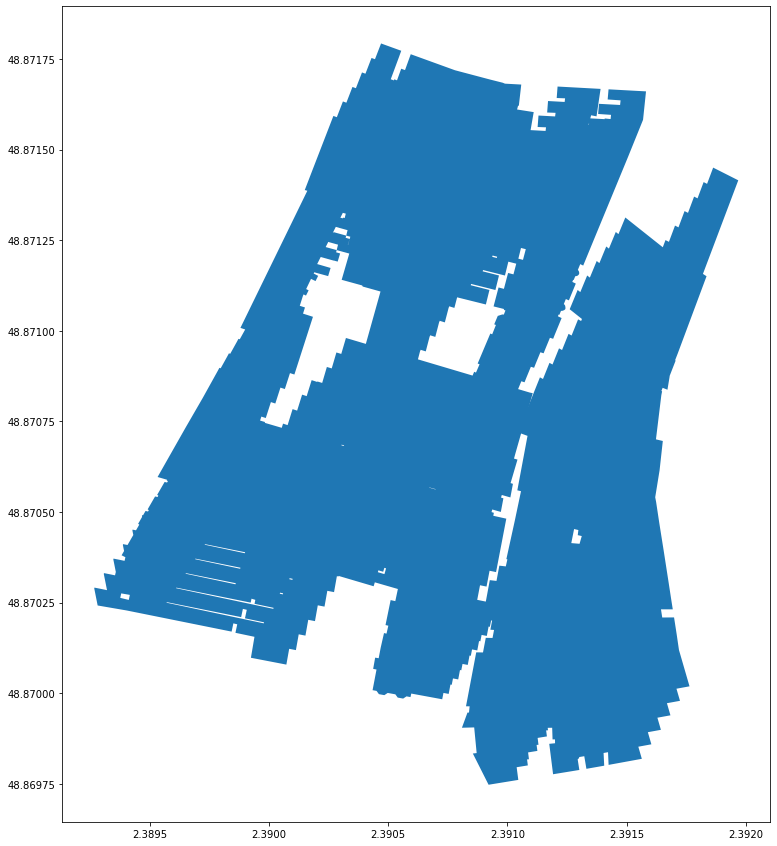

In [168]:
cBAT[13:15].plot( figsize=(15,15) )

In [153]:
BAT

,level_0,level_1,Name,Description,geometry
0,0,0,V,,"POLYGON ((2.38993 48.85226, 2.38980 48.85223, ..."
1,0,1,V,,"POLYGON ((2.39956 48.85306, 2.39957 48.85304, ..."
2,0,2,V,,"POLYGON ((2.39862 48.85352, 2.39860 48.85352, ..."
3,0,3,V,,"POLYGON ((2.40904 48.85491, 2.40905 48.85490, ..."
4,0,4,V,,"POLYGON ((2.39921 48.85543, 2.39928 48.85532, ..."
...,...,...,...,...,...
4451,0,4451,V,,"POLYGON ((2.34403 48.89035, 2.34401 48.89027, ..."
4452,0,4452,V,,"POLYGON ((2.35114 48.89035, 2.35106 48.89031, ..."
4453,0,4453,V,,"POLYGON ((2.36478 48.89050, 2.36491 48.89044, ..."
4454,0,4454,V,,"POLYGON ((2.39005 48.89053, 2.39018 48.89041, ..."
